## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
data = pd.read_csv(r'C:\Users\nagpa\OneDrive\Desktop\dataset.csv', parse_dates = ['DATE'])
data.head()
#data.DATE.dtype

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


### Working on PRCP column (Target Column)

In [3]:
data.loc[data['PRCP'] > 0, 'PRCP'] = 1

## Data Cleaning and Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1827 non-null   object        
 1   NAME     1827 non-null   object        
 2   DATE     1827 non-null   datetime64[ns]
 3   AWND     1823 non-null   float64       
 4   PGTM     62 non-null     float64       
 5   PRCP     1827 non-null   float64       
 6   TAVG     0 non-null      float64       
 7   TMAX     1827 non-null   int64         
 8   TMIN     1827 non-null   int64         
 9   WDF2     1822 non-null   float64       
 10  WDF5     1809 non-null   float64       
 11  WSF2     1823 non-null   float64       
 12  WSF5     1809 non-null   float64       
 13  WT01     551 non-null    float64       
 14  WT02     39 non-null     float64       
 15  WT08     861 non-null    float64       
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
memory usage: 228.5+ KB

In [5]:
data.shape

(1827, 16)

In [6]:
data.describe()

,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
count,1823.000000,62.000000,1827.000000,0.0,1827.000000,1827.000000,1822.000000,1809.000000,1823.000000,1809.000000,551.0,39.0,861.0
mean,1.675710,1404.854839,0.091407,NaN,76.498632,58.120416,254.143798,256.428966,9.062095,14.721669,1.0,1.0,1.0
std,0.909434,350.813754,0.288265,NaN,9.133929,7.223756,54.756284,55.571902,2.016827,3.622257,0.0,0.0,0.0
min,0.000000,103.000000,0.000000,NaN,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000,1.0,1.0,1.0
25%,1.120000,1337.500000,0.000000,NaN,70.000000,53.000000,260.000000,270.000000,8.100000,12.100000,1.0,1.0,1.0
50%,1.570000,1442.500000,0.000000,NaN,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000,1.0,1.0,1.0
75%,2.010000,1545.000000,0.000000,NaN,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000,1.0,1.0,1.0
max,8.050000,2314.000000,1.000000,NaN,111.000000,79.000000,360.000000,360.000000,21.000000,34.000000,1.0,1.0,1.0


## Visualizing Class Imbalance

<AxesSubplot:xlabel='PRCP', ylabel='count'>

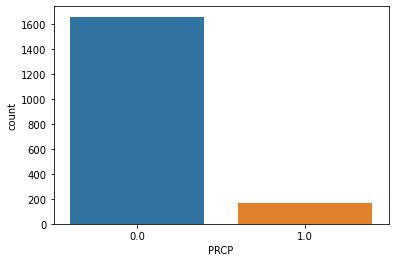

In [7]:
sns.countplot(x = 'PRCP',data = data)

#### Here we can clearly see the number of samples for the case when precipitation occurs is much less than for the case when precipitation does not occur. Hence, there is class imbalance

### Checking for Null Values

<AxesSubplot:>

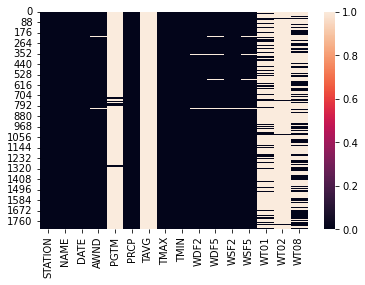

In [8]:
sns.heatmap(data.isnull())

#### Based on the heatmap, columns PGTM,TAVG,WT01,WT02,WT08 have too many null values and shall be dropped. The rest of the cells with null values will be imputed with the mode value 

In [9]:
data = data.drop(['PGTM','TAVG','WT01','WT02','WT08'],axis = 'columns')
data.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1


### Performing some Exploratory Data Analysis on text and datetime features

In [10]:
#data.STATION.value_counts()
#Since all have same value, dropping this feature
data = data.drop(['STATION'],axis='columns')

In [11]:
#data.NAME.value_counts()
#Since all have same value, dropping this feature
data = data.drop(['NAME'],axis='columns')

In [12]:
#data.DATE.nunique()
#Since all values are different, dropping this row for now since this is the basic version of the model.
#Later, in the advanced version, will try to categorize based on d,m,y etc.
data = data.drop(['DATE'],axis = 'columns')

In [13]:
#finding and dropping duplicates
data.duplicated().sum()
data.drop_duplicates(inplace = True)
data.reset_index(drop=True, inplace=True)

In [14]:
#checking for remaining null values before performing simple imputation
data.isnull().any()

AWND     True
PRCP    False
TMAX    False
TMIN    False
WDF2     True
WDF5     True
WSF2     True
WSF5     True
dtype: bool

In [15]:
#imputing the null values with mode
for i in data.columns:
    if data[i].isnull().any():
        data[i].fillna(data[i].mode()[0], inplace=True)

In [16]:
#finally checking to see if all null values have been dealt with
data.isnull().any()

AWND    False
PRCP    False
TMAX    False
TMIN    False
WDF2    False
WDF5    False
WSF2    False
WSF5    False
dtype: bool

<AxesSubplot:>

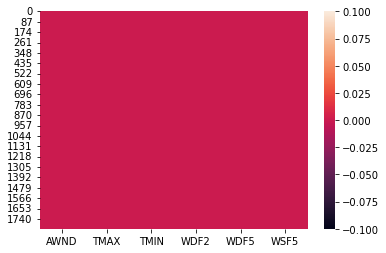

In [31]:
#Showing that all null values have been dealt with
sns.heatmap(data.isnull())

## Feature Selection (Selecting features based on statistical analysis)

### Chi Square Test

In [17]:
from sklearn.feature_selection import chi2
X = data.drop(['PRCP'],axis='columns')
y = data.PRCP
chi_scores = chi2(X,y)
chi_scores

(array([  78.99217899,  318.97057904,   53.99434374, 2307.72024401,
        1826.18067938,   32.22783028,   83.7298769 ]),
 array([6.23563041e-19, 2.42735069e-71, 2.01067594e-13, 0.00000000e+00,
        0.00000000e+00, 1.37112662e-08, 5.67214961e-20]))

<AxesSubplot:>

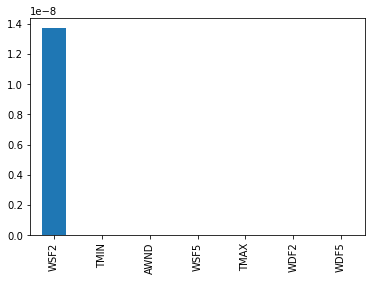

In [18]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

### Since WSF2 has high p-value, it says that this variables is independent of the repsone and can not be considered for model training

In [19]:
data = X.drop(['WSF2'],axis = 'columns')
data.head()

,AWND,TMAX,TMIN,WDF2,WDF5,WSF5
0,2.46,64,43,10.0,30.0,11.0
1,2.01,65,47,270.0,30.0,8.9
2,0.67,62,44,150.0,150.0,14.1
3,1.34,69,55,270.0,280.0,14.1
4,2.46,59,49,140.0,140.0,16.1


## Normalization (Setting a scale for all the features in the dataset)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score,confusion_matrix,classification_report
X_train,X_test,y_train,y_test = train_test_split(data,y,train_size = 0.8)
scaler = MinMaxScaler()
X_w_train = scaler.fit_transform(X_train)
X_train_x = pd.DataFrame(X_w_train,columns = X_train.columns)
X_w_test = scaler.transform(X_test)
X_test_x = pd.DataFrame(X_w_test,columns = X_test.columns)

In [21]:
# defining a function to evaluate my models based on certain metrics(all proposed ones except roc_auc which has been done separately)
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Implementing Different Models

### Logistic Regression

Best params: {'C': 16.768329368110066, 'penalty': 'l2'}
ROC_AUC score is : 0.9339288588443586
Test Result:
Accuracy Score: 91.23%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.930029   0.636364  0.912329    0.783196      0.899456
recall       0.975535   0.368421  0.912329    0.671978      0.912329
f1-score     0.952239   0.466667  0.912329    0.709453      0.901686
support    327.000000  38.000000  0.912329  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[319   8]
 [ 24  14]]



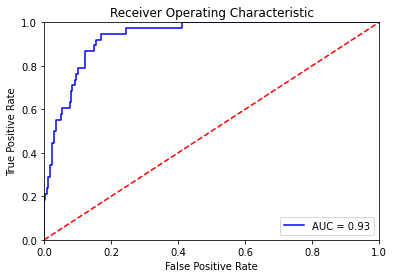

<AxesSubplot:>

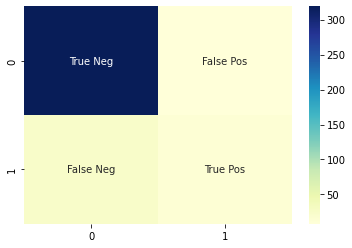

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : np.logspace(-4, 4, 50),'penalty' :['l2']} 

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,scoring = 'roc_auc')
grid.fit(X_train_x, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

lr = LogisticRegression(**best_params)
lr.fit(X_train_x,y_train)
y_preds = lr.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(lr, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_x)),annot = labels,fmt='',cmap = "YlGnBu")

### Support Vector Classifier

Best params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
ROC_AUC score is : 0.939562208272976
Test Result:
Accuracy Score: 91.51%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.925287   0.705882  0.915068    0.815585      0.902445
recall       0.984709   0.315789  0.915068    0.650249      0.915068
f1-score     0.954074   0.436364  0.915068    0.695219      0.900175
support    327.000000  38.000000  0.915068  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[322   5]
 [ 26  12]]



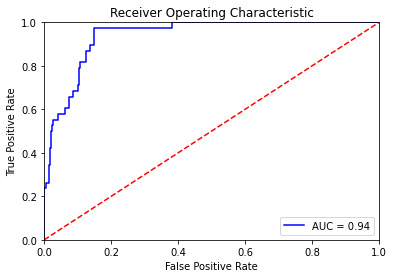

<AxesSubplot:>

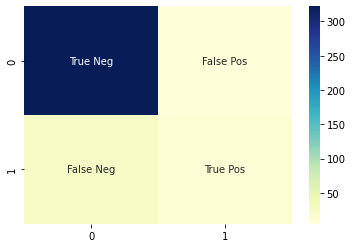

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid,cv=5)
grid.fit(X_train_x, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm = SVC(**best_params,probability = True)
svm.fit(X_train_x, y_train)
y_preds = svm.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(svm, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, svm.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Decision Tree Classifier

ROC_AUC score is : 0.7478673748591662
Test Result:
Accuracy Score: 92.33%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.946269   0.666667  0.923288    0.806468      0.917159
recall       0.969419   0.526316  0.923288    0.747867      0.923288
f1-score     0.957704   0.588235  0.923288    0.772970      0.919239
support    327.000000  38.000000  0.923288  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[317  10]
 [ 18  20]]



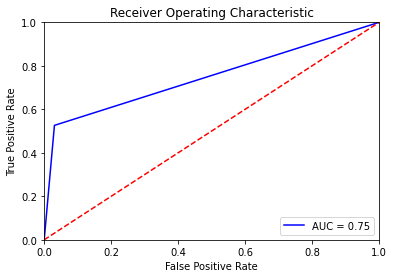

<AxesSubplot:>

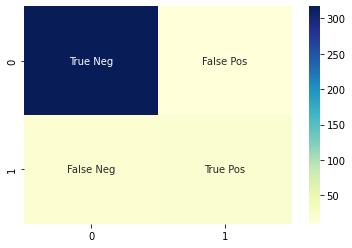

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

dt = DecisionTreeClassifier()
dt.fit(X_train_x, y_train)
y_preds = dt.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(dt, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Gaussian Naive Bayes

ROC_AUC score is : 0.9043135361339127
Test Result:
Accuracy Score: 88.22%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.952229   0.450980  0.882192    0.701605      0.900044
recall       0.914373   0.605263  0.882192    0.759818      0.882192
f1-score     0.932917   0.516854  0.882192    0.724886      0.889601
support    327.000000  38.000000  0.882192  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[299  28]
 [ 15  23]]



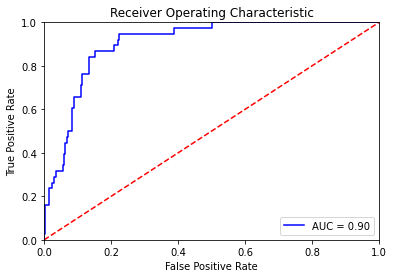

<AxesSubplot:>

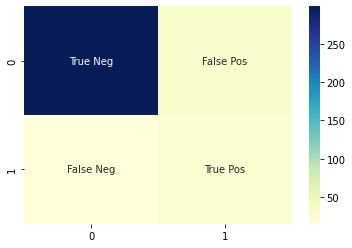

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
# param_grid = {} 

# grid = GridSearchCV(GaussianNB(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

gnb = GaussianNB()
gnb.fit(X_train_x, y_train)
y_preds = gnb.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(gnb, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, gnb.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Gradient Boosting Classifier

ROC_AUC score is : 0.9342105263157895
Test Result:
Accuracy Score: 92.60%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.943787   0.703704  0.926027    0.823745      0.918792
recall       0.975535   0.500000  0.926027    0.737768      0.926027
f1-score     0.959398   0.584615  0.926027    0.772007      0.920380
support    327.000000  38.000000  0.926027  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[319   8]
 [ 19  19]]



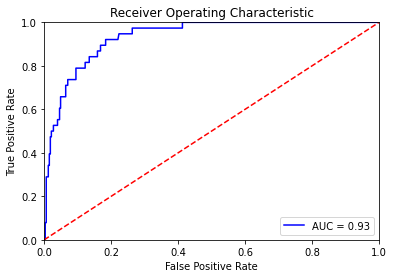

<AxesSubplot:>

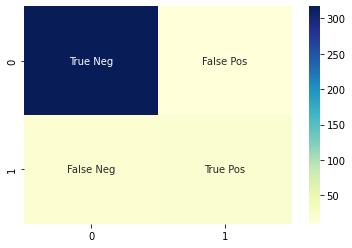

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# param_grid = {} 

# grid = GridSearchCV(GradientBoostingClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

gb = GradientBoostingClassifier()
gb.fit(X_train_x, y_train)
y_preds = gb.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(gb, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Random Forest Classifier

ROC_AUC score is : 0.9191211974891357
Test Result:
Accuracy Score: 92.33%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.935860   0.727273  0.923288    0.831566      0.914144
recall       0.981651   0.421053  0.923288    0.701352      0.923288
f1-score     0.958209   0.533333  0.923288    0.745771      0.913975
support    327.000000  38.000000  0.923288  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[321   6]
 [ 22  16]]



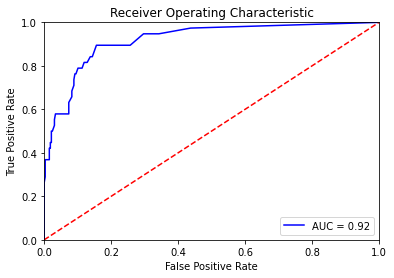

<AxesSubplot:>

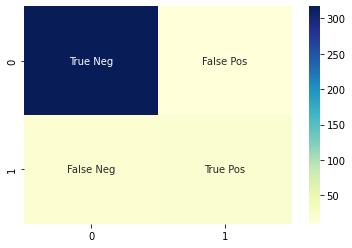

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

rf = RandomForestClassifier()
rf.fit(X_train_x, y_train)
y_preds = rf.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(rf, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### XGB Classifier

ROC_AUC score is : 0.9191211974891357
Test Result:
Accuracy Score: 93.42%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.949555   0.750000  0.934247    0.849777      0.928779
recall       0.978593   0.552632  0.934247    0.765612      0.934247
f1-score     0.963855   0.636364  0.934247    0.800110      0.929760
support    327.000000  38.000000  0.934247  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[320   7]
 [ 17  21]]



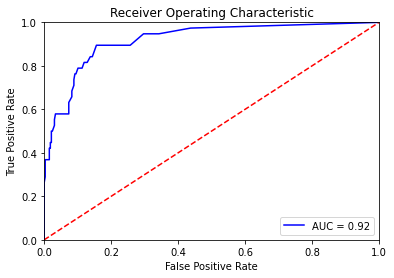

<AxesSubplot:>

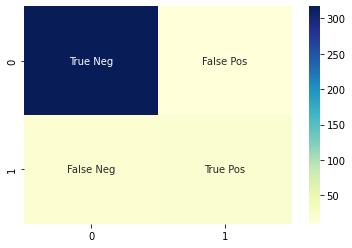

In [28]:
from xgboost import XGBClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

xgb = XGBClassifier(use_label_encoder=False, eval_metric = 'error')
xgb.fit(X_train_x, y_train)
y_preds = rf.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(xgb, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Cat Boost Classifier

ROC_AUC score is : 0.9191211974891357
Test Result:
Accuracy Score: 92.33%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.941003   0.692308  0.923288    0.816655      0.915111
recall       0.975535   0.473684  0.923288    0.724610      0.923288
f1-score     0.957958   0.562500  0.923288    0.760229      0.916787
support    327.000000  38.000000  0.923288  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[319   8]
 [ 20  18]]



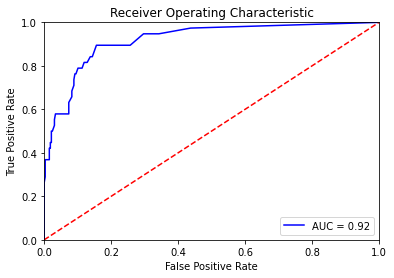

<AxesSubplot:>

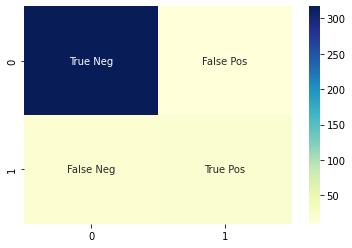

In [29]:
from catboost import CatBoostClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train_x, y_train)
y_preds = rf.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(cat, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

#### Applied Hyperparameter training for all models but it did not result in any significant improvement in most cases.

## Model Comparision

Accuracy score
LR: 0.932780 (0.019266)
CART: 0.899840 (0.020838)
NB: 0.886840 (0.016727)
SVM: 0.934837 (0.019443)
GBC: 0.934134 (0.024460)
RF: 0.932773 (0.018659)
XGB: 0.927976 (0.021169)
CAT: 0.936193 (0.022357)

ROC_AUC score
LR: 0.936245 (0.028607)
CART: 0.735001 (0.054927)
NB: 0.889510 (0.024465)
SVM: 0.936124 (0.027038)
GBC: 0.917697 (0.037065)
RF: 0.907821 (0.038175)
XGB: 0.916630 (0.032658)
CAT: 0.928849 (0.030465)



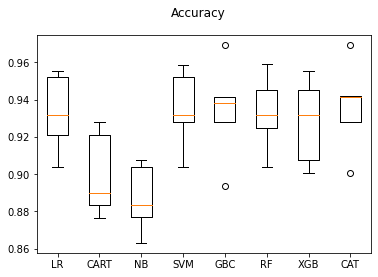

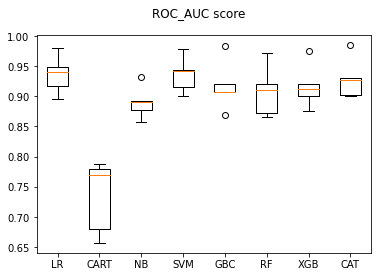

In [30]:
#Comparing models based on Accuracy score and ROC_AUC score using boxplots
from sklearn import model_selection
models = []
models.append(('LR', lr))
models.append(('CART', dt))
models.append(('NB', gnb))
models.append(('SVM', svm))
models.append(('GBC', gb))
models.append(('RF',rf))
models.append(('XGB',xgb))
models.append(('CAT',cat))
results = []
results2 = []
names = []
print("Accuracy score")
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train_x, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('')
print("ROC_AUC score")
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train_x, y_train, cv=kfold, scoring='roc_auc')
    results2.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('')
fig = plt.figure()
fig.suptitle('Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
fig2 = plt.figure()
fig2.suptitle('ROC_AUC score')
ax2 = fig2.add_subplot(111)
plt.boxplot(results2)
ax2.set_xticklabels(names)
plt.show()